In [13]:
from core import *
import os , random

directory = '/home/mmed/Documents/projects/bill_reader/data'
bill = random.choice(os.listdir(directory))
file =os.path.join(directory, bill)
# file = '/home/mmed/Documents/projects/bill_reader/data/wholefoods_500100364.pdf'

In [3]:
fig_size = plt.rcParams["figure.figsize"]
print(bill)

wholefoods_500100364.pdf


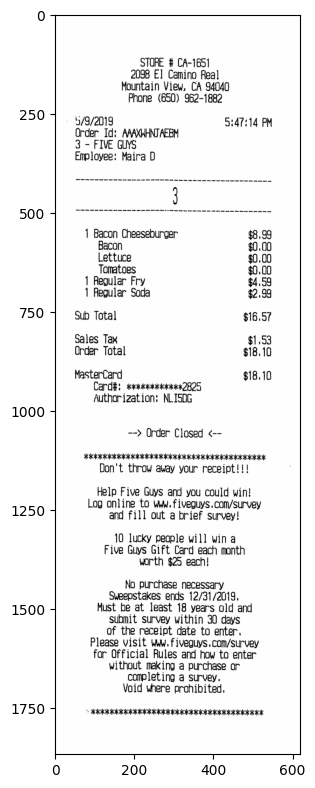

In [14]:
plt.rcParams["figure.figsize"] = [2 * x for x in fig_size]
image = get_image(file)
plt.imshow(image)
plt.show()

In [15]:
results = ts.image_to_data(image, 
output_type=Output.DICT)
df = pd.DataFrame(data= results)
df = df[df.text != '']
df = df.apply(clean_the_text,axis= 1)

In [19]:
product_lines = get_lines(df)
del_suffix(product_lines)
product_lines

{545: ['1', 'Bacan Cheeseburger', '$8.99'],
 575: ['Bacon', '$0.00'],
 605: ['Lettuce', '$0.00'],
 634: ['Tomatoes', '$0.00'],
 664: ['1', 'Regular Fry', '$4.59'],
 693: ['1', 'Regular Soda', '$2.93'],
 752: ['Sub Total', '$16.57'],
 811: ['Sales Tax', '$1.53'],
 840: ['Order Total', '$18.10'],
 900: ['MasterCard', '$18.10']}

In [25]:
additional_data = process_additional_data(product_lines)
additional_data

{'state': '', 'subtotal': 16.57, 'costs': 1.53, 'total': 18.1, 'limit': 752}

In [27]:
to_del = []
for line in product_lines:
    if line >= additional_data['limit']:
        to_del.append(line)
for line in to_del:
    product_lines.pop(line)
isolate_products(product_lines)
product_lines

{545: ['1', 'Bacan Cheeseburger', '$8.99'],
 575: ['Bacon', '$0.00'],
 605: ['Lettuce', '$0.00'],
 634: ['Tomatoes', '$0.00'],
 664: ['1', 'Regular Fry', '$4.59'],
 693: ['1', 'Regular Soda', '$2.93']}

In [28]:
formats = []
for line in product_lines:
    formats.append(get_format(product_lines[line]))
print(most_frequent(formats))

['quantity', 'desc', 'price']


In [29]:
formats = []
for line in product_lines:
    formats.append(get_format(product_lines[line]))
chosen_format = most_frequent(formats)
product_list = pd.DataFrame(columns=chosen_format)
for line in product_lines:
    if follow_format(product_lines[line],chosen_format):
        product_list.loc[len(product_list.index)] = get_data(product_lines[line],chosen_format)
product_list


,quantity,desc,price
0,1,Bacan Cheeseburger,$8.99
1,1,Regular Fry,$4.59
2,1,Regular Soda,$2.93


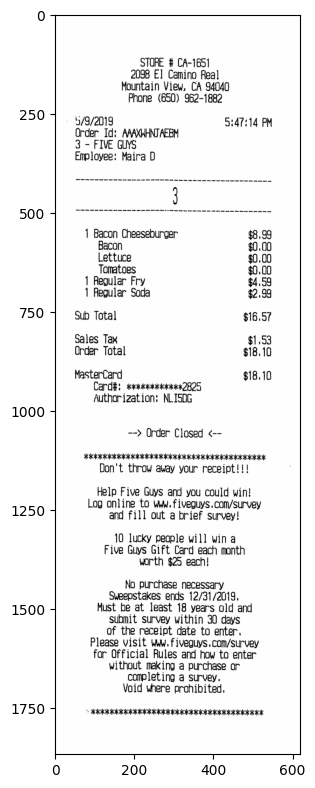

In [30]:
plt.rcParams["figure.figsize"] = [ 2 * x for x in fig_size]
image = get_image(file)
plt.imshow(image)
plt.show()